# Assignment 1
Elements of Data Science and Artificial Intelligence
<br>
Winter Semester 2022/2023
<br>
Saarland University

Prof. Dr. Dittrich
<br>
Prof. Dr. Hoffmann
<br>
Prof. Dr. Schiele
<br>
Dr. Schuster

The first assignment is exclusively about Python and asks you to solve small tasks. Insert your solution in the cells marked with `TODO: implement`. For each exercise, we have written a few unit tests so you are able to check your implementation right away (keep in mind that passing the unit tests does not necessarily mean your implementation computes the desired output for all possible inputs of your function!). In case you have questions, feel free to use our [forum](https://edsai.cs.uni-saarland.de/). 

**You are not allowed to use third-party libraries or additional Python modules unless otherwise specified.**

#### Submission Details
Upload your submission to our [CMS](https://cms.sic.saarland/edsai2223/) in groups of two to three students until **November 23, 2022 23:59**. Late submissions will not be graded! Your submission should only contain this **.ipynb** file.

In [1]:
# define the unittests
%run -i assignment01_unittests

## Exercise 1: Statistical computations (4 Points)

### a) Arithmetic mean (1 Points)
Implement a function `mean(input_list)` that returns the arithmetic mean of the elements contained in `input_list`. The arithmetic mean is defined as follows:
$$
\text{mean}([a_{0}, \cdots, a_{n-1}]) = \frac{1}{n}\sum_{i=0}^{n-1} a_{i}
$$

In [2]:
mean = lambda x: (1/len(x))*sum(x)

In [3]:
# Run tests
# Note: due to floating point precision, we test for almost equality
# see: https://docs.python.org/3/library/unittest.html#unittest.TestCase.assertAlmostEqual
unittest.main(argv=['ignored', '-v', 'MeanTest'], verbosity=2, exit=False)

test_large (__main__.MeanTest) ... ok
test_negative (__main__.MeanTest) ... ok
test_same (__main__.MeanTest) ... ok
test_small (__main__.MeanTest) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.020s

OK


### b) Variance (1.5 Points)
Implement a function `variance(input_list)` that returns the variance of the elements contained in *input_list*. The variance is defined as follows:

$$
\text{variance}([a_{0}, \cdots, a_{n-1}]) = \frac{\sum_{i=0}^{n-1} (a_{i}-\mu)^2}{n - 1}
$$
where:
* $[a_{0}, \cdots, a_{n-1}]$ is a list of integers
* $\mu$ is the mean value of the elements in the list
* $n$ is the number of elements in the list

You may assume that *input_list* contains at least two elements.

In [4]:
variance = lambda x: (1/(len(x)-1)) * sum([(a-mean(x))**2 for a in x])

In [5]:
# Run tests
# Note: due to floating point precision, we test for almost equality
# see: https://docs.python.org/3/library/unittest.html#unittest.TestCase.assertAlmostEqual
unittest.main(argv=['ignored', '-v', 'VarTest'], verbosity=2, exit=False)

test_large (__main__.VarTest) ... ok
test_negative (__main__.VarTest) ... ok
test_same (__main__.VarTest) ... ok
test_small (__main__.VarTest) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.013s

OK


### c) Median (1.5 Points)
Implement a function `median(input_list)` that returns the median of a given *input_list*. The median is the value separating the lower half from the upper half of a dataset and is defined as follows:

$$
\text{median}([a_{0}, \cdots, a_{n-1}]) =
\begin{cases}
a_{\frac{n-1}{2}}, & n \text{ is odd}\\
\frac{1}{2} (a_{\frac{n}{2}-1} + a_{\frac{n}{2}})  & n \text{ is even}\\
\end{cases}
$$

where $[a_{0}, \cdots, a_{n-1}]$ is a sorted list of integers and $n$ is the number of elements in the list.

You may assume that *input_list* is not empty but not necessarily sorted. 

In [6]:
# TODO: implement
def median(x):
    x = sorted(x)
    n = len(x)
    if len(x) % 2 == 1:
        return x[int((n-1)/2)]
    return 0.5 * (x[int((n/2) - 1)] + x[int(n/2)])

In [7]:
# Run tests
unittest.main(argv=['ignored', '-v', 'MedianTest'], verbosity=2, exit=False)

test_even (__main__.MedianTest) ... ok
test_odd (__main__.MedianTest) ... ok
test_single (__main__.MedianTest) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.010s

OK


## Exercise 2: Complex Functions (5 Points)

### a) Sum of the digits (2 Points)
Implement a function `sum_digits(x)` that returns the sum of the digits of a non-negative integer $x$. For example:

$$ \text{sum_digits(1374)} = 1 + 3 + 7 + 4 = 15 $$

**Hint:** Make clever use of `div` (Python operator `//`) and `modulo` (Python operator `%`) to extract the individual digits. 

In [8]:
def sum_digits(x):
    s = 0
    while x > 0:
        s += x % 10
        x = x // 10
    return s

In [9]:
# Run tests
unittest.main(argv=['ignored', '-v', 'SumDigitsTest'], verbosity=2, exit=False)

test_long (__main__.SumDigitsTest) ... ok
test_one (__main__.SumDigitsTest) ... ok
test_small (__main__.SumDigitsTest) ... ok
test_zero (__main__.SumDigitsTest) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.014s

OK


### b) Levenshtein Distance (3 Points)
Implement a function `lev(a,b)` that returns the [Levenshtein distance](https://en.wikipedia.org/wiki/Levenshtein_distance) between the two strings `a` and `b`. The Levenshtein distance is defined as follows:

$$
\text{lev}(a,b) =
\begin{cases}
|a| & \text{if}\ |b| = 0\\
|b| & \text{if}\ |a| = 0\\
\text{lev}(\text{tail}(a), \text{tail}(b)) & \text{if}\ a[0] = b[0]\\
1 + \text{min}(\text{lev}(\text{tail}(a), b), \text{lev}(a, \text{tail}(b)), \text{lev}(\text{tail}(a), \text{tail}(b))) & \text{otherwise}
\end{cases}
$$
where:
* |a| represents the length of the string _a_
* a[0] is the first character of the string _a_
* tail(a) is a string of all but the first character of _a_

Note: The straightforward recursive implementation is highly inefficient. Therefore, only small strings (up to ~10 characters) should be used.

In [10]:
def tail(x):
    return x[1:]


def lev(a, b):
    if len(b) == 0:
        return len(a)
    if len(a) == 0:
        return len(b)
    if a[0] == b[0]:
        return lev(tail(a), tail(b))
    return 1 + min(lev(tail(a), b), lev(a, tail(b)), lev(tail(a), tail(b)))

In [11]:
# Run tests
unittest.main(argv=['ignored', '-v', 'LevenshteinDistanceTest'], verbosity=2, exit=False)

test_equal (__main__.LevenshteinDistanceTest) ... ok
test_long (__main__.LevenshteinDistanceTest) ... ok
test_normal (__main__.LevenshteinDistanceTest) ... ok
test_small (__main__.LevenshteinDistanceTest) ... ok

----------------------------------------------------------------------
Ran 4 tests in 4.862s

OK


## Exercise 3: Classes (5 Points)

In this exercise, we will implement a small movie company structure consisting of `Movie`s and `Person`s.

The `Movie` class should contain the following data attributes.
* `title` - the movie title
* `year` - the year in which the movie was released
* `genre` - the main genre of the movie, one of [ACTION, DRAMA, THRILLER, COMEDY, HORROR]

*Note: We expect the genre to be all in upper case, therefore, e.g. "Action" or "action" are invalid genres.*

The `Movie` class should contain the following methods.
* `__init__(self, title, year, genre)`: the constructor taking three arguments $title$, $year$, and $genre$ representing the title, year, and genre; the constructor should check the correctness of the `genre` parameter and print a warning in case a incorrect value was provided (Note: the class will still be created)
* `get_title(self)` - returns the `title` of the movie
* `get_year(self)` - returns the `year` of the movie
* `get_genre(self)` - returns the `genre` of the movie
* `__eq__(self, other)` - returns `True` iff the `title`, `year`, and `genre` are equal, `False` otherwise.

*Hint: The function `__eq__` overloads the equality operator `==`. If `__eq__` is defined on `x` the expression `x == y` is the same as `x.__eq__(y)`. This allows you to check if two movies `x` and `y` are equal by `x == y`. For more information see [here](https://docs.python.org/3/reference/datamodel.html#object.__eq__).*

A `Person` has a `name` and a `surname`. Furthermore, a `Person` can either be an `Actor` or a `Director`, which should be represented using inheritance. A `Director` has exactly one `Movie` that she or he directed. An `Actor` contains a list of `Movie`s she or he participated in.

The `Person` class should contain the following methods.
* `get_name(self)` - returns the name of the person
* `get_surname(self)` - returns the surname of the person

The `Director` class should contain the following methods.
* `get_movie(self)` - returns the `Movie` directed by the `Director`
* `actor_in_movie(self, actor)` - takes an `Actor` and returns `True` iff the `Actor` participated in the `Director`'s `Movie`, `False` otherwise

The `Actor` class should contain the following methods.
* `get_all_movies(self)` - returns the list of **all** `Movie`s the `Actor` participated in
* `get_movies(self, year, genre)` - returns a list containing the `Movies` with the genre `genre` and were released **after** `year`

In [12]:
class Movie:
    def __init__(self, title, year, genre):
        if genre.upper() != genre:
            print("WARNING! genre is not uppercased")
            genre = genre.upper()

        self.title = title
        self.year = year
        self.genre = genre

    def get_title(self):
        return self.title

    def get_year(self):
        return self.year

    def get_genre(self):
        return self.genre

    def __eq__(self, other):
        if type(other) != type(self):
            return False

        return self.title == other.title and self.year == other.year and self.genre == other.genre

class Person:
    def __init__(self, name, surname):
        self.name = name
        self.surname = surname

    def get_name(self):
        return self.name

    def get_surname(self):
        return self.surname

class Director(Person):
    def __init__(self, name:str, surname:str, movie:Movie):
        super().__init__(name, surname)
        self.movie = movie

    def get_movie(self):
        return self.movie

    def actor_in_movie(self, actor):
        return self.movie in actor.get_all_movies()

class Actor(Person):
    def __init__(self, name, surname, movies:[Movie]):
        super().__init__(name, surname)

        self.movies = movies

    def get_all_movies(self):
        return self.movies

    def get_movies(self, genre, year):
        print(self.movies)
        return [m for m in self.movies if m.get_year() > year and m.get_genre() == genre]

In [13]:
# Run tests
unittest.main(argv=['ignored', '-v', 'MovieTest'], verbosity=2, exit=False)
unittest.main(argv=['ignored', '-v', 'PersonTest'], verbosity=2, exit=False)

test_movie_ctor (__main__.MovieTest) ... ok
test_movie_eq (__main__.MovieTest) ... ok
test_movie_get_genre (__main__.MovieTest) ... ok
test_movie_get_title (__main__.MovieTest) ... ok
test_movie_get_year (__main__.MovieTest) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.013s

OK
test_actor_ctor (__main__.PersonTest) ... ok
test_actor_get_all_movies (__main__.PersonTest) ... ok
test_actor_get_movies_contrained (__main__.PersonTest) ... ok
test_actor_inheritance (__main__.PersonTest) ... ok
test_director_actor_in_movie (__main__.PersonTest) ... ok
test_director_actor_not_in_movie (__main__.PersonTest) ... ok
test_director_ctor (__main__.PersonTest) ... ok
test_director_get_movie (__main__.PersonTest) ... ok
test_director_inheritance (__main__.PersonTest) ... ok
test_person_ctor (__main__.PersonTest) ... ok
test_person_get_name (__main__.PersonTest) ... ok
test_person_get_surname (__main__.PersonTest) ... 

[<__main__.Movie object at 0x000002E3DBCBA970>, <__main__.Movie object at 0x000002E3DBCBA850>]


ok

----------------------------------------------------------------------
Ran 12 tests in 0.034s

OK


## Exercise 4: Data Cleaning (6 Points)

In this exercise, we will again deal with the [IMDb](https://www.imdb.com/interfaces/) dataset from the lecture. However, this time it has been slightly changed, so some data needs to be corrected. First we have to load the data.

In [25]:
import pandas as pd

df = pd.read_csv('imdb_corrupt.csv', delimiter=';')

# Print infos
display(df.head())
df.shape

,Title,Genre,Director,Actors,Year,Rating
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,8.1
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,7.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,7.3
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,7.2
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,6.2


(1003, 6)

### a) Eliminate duplicates (3 Points)

One reason for duplicates can be spelling errors or inconsistent usage of (superfluous) special characters or whitespaces. In this exercise, we will make use of the well know edit distance [Hammming distance](https://en.wikipedia.org/wiki/Hamming_distance) to identify duplicate entries due to spelling errors in the movie titles.

*Note: This only removes one potential source of error.*

1. Implement a function `hamming_distance_custom(a, b)`, that takes two strings `a` and `b` and returns the hamming distance of both strings. Our custom Hamming distance is defined as follows:

$$
\text{hamming_distance_custom}(a,b) =
\begin{cases}
\infty & \text{if}\ |a| \neq |b|\\
0 & \text{if}\ |a| =  0\\
0 + \text{hamming_distance_custom}(\text{tail}(a), \text{tail}(b)) & \text{if}\ a[0] = b[0]\\
1 + \text{hamming_distance_custom}(\text{tail}(a), \text{tail}(b)) & \text{otherwise}
\end{cases}
$$

where:
* |a| represents the length of the string _a_
* a[0] is the first character of the string _a_
* tail(a) is a string of all but the first character of _a_

Note: You can use `math.inf` as $\infty$.

In [26]:
import math

def hamming_distance_custom(a, b):
    if len(a) != len(b):
        return math.inf
    if len(a) == 0:
        return 0
    if a[0] == b[0]:
        return 0 + hamming_distance_custom(tail(a), tail(b))
    return 1 + hamming_distance_custom(tail(a), tail(b))

In [27]:
# Run tests
unittest.main(argv=['ignored', '-v', 'HammingDistanceTest'], verbosity=2, exit=False)

test_different_length (__main__.HammingDistanceTest) ... ok
test_empty (__main__.HammingDistanceTest) ... ok
test_equal (__main__.HammingDistanceTest) ... ok
test_long (__main__.HammingDistanceTest) ... ok
test_normal (__main__.HammingDistanceTest) ... ok
test_small (__main__.HammingDistanceTest) ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.021s

OK


2. Check if the movies given in `movies_to_check` contain any spelling mistakes. To do so, iterate over the dataframe `df` and compute the pairwise hamming distance between each title and the movie titles given in `movies_to_check`. If the hamming distance is between 0 and 3 (exclusive, i.e. we have up to two typos), add the potentially misspelled movie title to the `duplicate_movies` list.

*Note: This method only identifies potential spelling mistakes. There might be errors that are not detected (e.g. if a character is missing) or very similar movie titles that are detected but in reality, do not contain any spelling mistakes.*

In [28]:
movies_to_check = ['Harry Potter and the Deathly Hallows: Part 1',
                   'Star Wars: Episode VII',
                   'The Great Wall',
                   'Nine Lives',
                   'The Lone Ranger',
                   'The Lego Movie',
                   'Frozen',
                   'Lucky Number Slevin'
                  ]

duplicate_movies = []

for i in range(df.shape[0]):
    for title in movies_to_check:
        if 0 < hamming_distance_custom(df.iloc[i]["Title"], title) < 3:
            duplicate_movies.append(df.iloc[i]["Title"])


display(duplicate_movies)

['Harry Potter and the Deathly Hallows: Part 2',
 'The Graet Wall',
 'Frozem',
 'The Lego Movoe']

In [29]:
# Run tests
unittest.main(argv=['ignored', '-v', 'DuplicatesTest'], verbosity=2, exit=False)

test_duplicates (__main__.DuplicatesTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


3. Afterwards, manually inspect the list of potentially duplicated movies and remove those movies, that actually do not contain any spelling mistakes.

In [30]:
duplicate_movies = [
 'The Graet Wall',
 'Frozem',
 'The Lego Movoe']

4. Finally, we remove all duplicates from the DataFrame `df` and store the result in the `df` variable again.

In [31]:
df_duplicates = df[(df['Title'].isin(duplicate_movies))]
display(df_duplicates)
df.drop(df_duplicates.index, inplace=True, axis='index')
display(df.shape)

,Title,Genre,Director,Actors,Year,Rating
131,The Graet Wall,"Action,Adventure,Fantasy",Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016.0,6.1
341,Frozem,"Animation,Adventure,Comedy",Chris Buck,"Kristen Bell, Idina Menzel, Jonathan Groff, Jo...",2013.0,7.5
798,The Lego Movoe,"Animation,Action,Adventure",Phil Lord,"Chris Pratt, Will Ferrell, Elizabeth Banks, Wi...",2014.0,7.8


(1000, 6)

### b) Replace missing and erroneous values (3 Points)

1. Missing values are denoted as `NaN` in `Pandas`. List all rows that contain missing values and store them in a new DataFrame `df_missing`.

In [32]:
# TODO: implement
df_missing = df[df.isnull().any(1)]

C:\Users\felix\AppData\Local\Temp\ipykernel_12104\3941044155.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df_missing = df[df.isnull().any(1)]


In [33]:
display(df_missing)
# Run tests
unittest.main(argv=['ignored', '-v', 'MissingTest'], verbosity=2, exit=False)

,Title,Genre,Director,Actors,Year,Rating
71,Allied,NaN,Robert Zemeckis,"Brad Pitt, Marion Cotillard, Jared Harris, Vin...",2016.0,7.1
145,Django Unchained,"Drama,Western",NaN,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...",2012.0,8.4
246,Les Misérables,"Drama,Musical,Romance",Tom Hooper,"Hugh Jackman, Russell Crowe, Anne Hathaway,Ama...",2012.0,NaN
295,Man of Steel,"Action,Adventure,Fantasy",Zack Snyder,"Henry Cavill, Amy Adams, Michael Shannon, Dian...",NaN,7.1


test_missing_values (__main__.MissingTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Afterwards, check [IMDB.com](https://www.imdb.com/) for the entries with missing values and manually add them to the DataFrame `df`.

In [34]:
import numpy as np

df[df["Title"] == df_missing.iloc[0]["Title"]] = df[df["Title"] == df_missing.iloc[0]["Title"]].replace(np.nan, "Action, Drama, Liebesfilm, Thriller, Kriegsfilm")
df[df["Title"] == df_missing.iloc[1]["Title"]] = df[df["Title"] == df_missing.iloc[1]["Title"]].replace(np.nan, "Quentin Tarantino")
df[df["Title"] == df_missing.iloc[2]["Title"]] = df[df["Title"] == df_missing.iloc[2]["Title"]].replace(np.nan, 7.5)
df[df["Title"] == df_missing.iloc[3]["Title"]] = df[df["Title"] == df_missing.iloc[3]["Title"]].replace(np.nan, 2013)

2. Erroneous values

In the following, we want to examine the attributes `Year` and `Rating` for potential erroneous values. Here, the rating is a number between 0 and 10 (inclusive) and the data covers the years from 2006 to 2016. A good approach to find erroneous values in numerical data is to visualize them. Therefore, create boxplots for the columns in question using `matplotlib` (see also [here](https://stackoverflow.com/questions/17725927/boxplots-in-matplotlib-markers-and-outliers)).

{'whiskers': [<matplotlib.lines.Line2D at 0x2e3e00a27f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2e3e00a2d30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2e3e00a2550>],
 'medians': [<matplotlib.lines.Line2D at 0x2e3e00ad2b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2e3e00ad550>],
 'means': []}

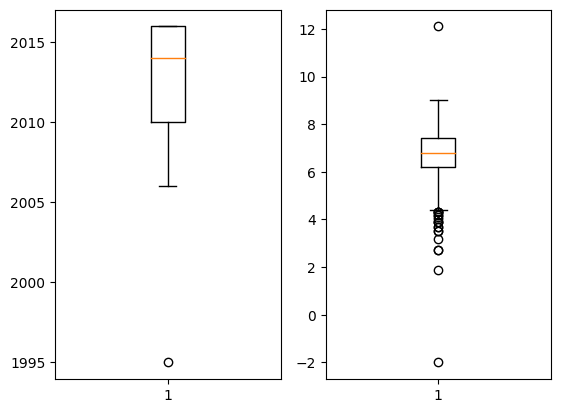

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1, 2)
ax[0].boxplot(df["Year"])
ax[1].boxplot(df["Rating"])

Through the plot outliers become visible, which give an indication of possibly erroneous values. Filter potential outlier values appropriately and store them in the DataFrame `df_outliers`.

In [45]:
less_than_2006 = df["Year"] < 2006
greater_than_2016 = df["Year"] > 2016
less_than_zero = df["Rating"] < 0
greater_than_10 = df["Rating"] > 10

together = less_than_2006 | greater_than_2016 | less_than_zero | greater_than_10
df_outliers = df[together]

In [47]:
display(df_outliers)
# Run tests
unittest.main(argv=['ignored', '-v', 'OutliersTest'], verbosity=2, exit=False)

,Title,Genre,Director,Actors,Year,Rating
316,Snowpiercer,"Action,Drama,Sci-Fi",Bong Joon Ho,"Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris",2013.0,-2.0
545,P.S. I Love You,"Drama,Romance",Richard LaGravenese,"Hilary Swank, Gerard Butler, Harry Connick Jr....",1995.0,7.1
606,The Rise of the Krays,"Crime,Drama",Zackary Adler,"Matt Vael, Simon Cotton, Kevin Leslie, Olivia ...",2015.0,12.1


test_outliers (__main__.OutliersTest) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.006s

OK


Again, check [IMDB.com](https://www.imdb.com/) for the entries with potential erroneous values and manually correct them in the DataFrame `df`.

In [48]:
# TODO: implement
df[df["Title"] == df_missing.iloc[0]["Title"]] = df[df["Title"] == df_missing.iloc[0]["Title"]].replace(-2.0, 7.1)
df[df["Title"] == df_missing.iloc[1]["Title"]] = df[df["Title"] == df_missing.iloc[1]["Title"]].replace(1995, 2007)
df[df["Title"] == df_missing.iloc[2]["Title"]] = df[df["Title"] == df_missing.iloc[2]["Title"]].replace(12.1, 4.9)
